# Install spark & PySpark

In [1]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xzvf spark-3.1.2-bin-hadoop2.7.tgz
!pip install -q findspark==1.3.0

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,620 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,224 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,513 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease 

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [3]:
!pip install pyspark==3.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 MB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 19.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880746 sha256=1e0e4ab702bc46adcefa8d5e0342e24b097d29253f68495e76857c9f24513267
  Stored in directory: /root/.cache/pip/wheels/ef/70/50/7882e1bcb5693225f7cc86698f10953201b48b3f36317c2d18
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.5.3
    Uninstalling pyspark-3.5.3:
      Successfully uninstalled pyspark-3.5.3


In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Download data (CSV)


*   Read CSV file by "spark.read.csv" command



In [5]:
!wget -O data.zip https://file.designil.com/zdOfUE+
!unzip data.zip

--2024-11-29 12:42:04--  https://file.designil.com/zdOfUE+
Resolving file.designil.com (file.designil.com)... 104.21.8.81, 172.67.130.97, 2606:4700:3031::6815:851, ...
Connecting to file.designil.com (file.designil.com)|104.21.8.81|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-std.droplr.net/files/acc_513973/zdOfUE [following]
--2024-11-29 12:42:05--  https://cdn-std.droplr.net/files/acc_513973/zdOfUE
Resolving cdn-std.droplr.net (cdn-std.droplr.net)... 18.238.136.102, 18.238.136.83, 18.238.136.49, ...
Connecting to cdn-std.droplr.net (cdn-std.droplr.net)|18.238.136.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6704411 (6.4M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   6.39M  36.6MB/s    in 0.2s    

2024-11-29 12:42:05 (36.6 MB/s) - ‘data.zip’ saved [6704411/6704411]

Archive:  data.zip
  inflating: ws2_data.csv            


In [6]:
dt = spark.read.csv('/content/ws2_data.csv', header = True, inferSchema = True, )

# Data Profiling

In [7]:
dt

DataFrame[timestamp: string, user_id: string, book_id: int, country: string, price: double]

In [8]:
dt.show()

+-------------------+--------+-------+--------------------+-----+
|          timestamp| user_id|book_id|             country|price|
+-------------------+--------+-------+--------------------+-----+
|2021-05-01 08:03:44|824dc295|      2|              Israel|24.95|
|2021-05-02 02:48:34|f80fe106|      6|            Thailand|31.49|
|2021-05-01 16:54:57|01cb9fe0|      9|               Italy|29.65|
|2021-05-01 21:45:28|59508f47|     13|        South Africa| 22.4|
|2021-05-01 14:50:52|3553ebbb|     14|              Canada| 28.0|
|2021-05-01 08:41:48|ea28260a|     16|United States of ...|31.18|
|2021-05-01 05:51:43|ff44767e|     18|United States of ...|59.99|
|2021-05-01 00:01:09|b07799e7|     20|              Canada| 28.0|
|2021-05-01 00:21:24|9d2e93c8|     20|             Hungary| 28.0|
|2021-05-01 01:34:23|612db483|     20|              Sweden| 28.0|
|2021-05-01 01:42:10|afad01ae|     20|              France| 28.0|
|2021-05-01 03:38:00|3b68cda1|     20|              Canada| 28.0|
|2021-05-0

In [9]:
dt.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- price: double (nullable = true)



In [12]:
print(dt.count(), len(dt.columns))

500000 5


In [15]:
dt.describe().show()

+-------+-------------------+--------+-----------------+-------+------------------+
|summary|          timestamp| user_id|          book_id|country|             price|
+-------+-------------------+--------+-----------------+-------+------------------+
|  count|             500000|  499998|           500000| 500000|            500000|
|   mean|               null|Infinity|       740.377786|   null|31.459311680039008|
| stddev|               null|     NaN|559.9366172146341|   null|10.945931459891705|
|    min|2021-05-01 00:00:04|00000f49|                1|Algeria|               0.0|
|    max|2021-07-31 23:59:55|ffffe3e7|             2269|  Yemen|              84.0|
+-------+-------------------+--------+-----------------+-------+------------------+



In [16]:
# user_id has 2 missing values.
dt.where(dt.user_id.isNull()).show()

+-------------------+-------+-------+-------+-----+
|          timestamp|user_id|book_id|country|price|
+-------------------+-------+-------+-------+-----+
|2021-05-01 14:41:20|   null|    516| Brazil|27.37|
|2021-06-30 02:27:00|   null|   1390|  Japan|27.99|
+-------------------+-------+-------+-------+-----+



# EDA - Exploratory Data Analysis


*   Non-Graphical EDA
*   Graphical EDA (By seaborn matplotlib and pandas package)



In [17]:
# Numeric Data
dt.where(dt.price >= 1).show()

+-------------------+--------+-------+--------------------+-----+
|          timestamp| user_id|book_id|             country|price|
+-------------------+--------+-------+--------------------+-----+
|2021-05-01 08:03:44|824dc295|      2|              Israel|24.95|
|2021-05-02 02:48:34|f80fe106|      6|            Thailand|31.49|
|2021-05-01 16:54:57|01cb9fe0|      9|               Italy|29.65|
|2021-05-01 21:45:28|59508f47|     13|        South Africa| 22.4|
|2021-05-01 14:50:52|3553ebbb|     14|              Canada| 28.0|
|2021-05-01 08:41:48|ea28260a|     16|United States of ...|31.18|
|2021-05-01 05:51:43|ff44767e|     18|United States of ...|59.99|
|2021-05-01 00:01:09|b07799e7|     20|              Canada| 28.0|
|2021-05-01 00:21:24|9d2e93c8|     20|             Hungary| 28.0|
|2021-05-01 01:34:23|612db483|     20|              Sweden| 28.0|
|2021-05-01 01:42:10|afad01ae|     20|              France| 28.0|
|2021-05-01 03:38:00|3b68cda1|     20|              Canada| 28.0|
|2021-05-0

In [18]:
# Text Data
dt.where(dt.country == 'Canada').show()

+-------------------+--------+-------+-------+-----+
|          timestamp| user_id|book_id|country|price|
+-------------------+--------+-------+-------+-----+
|2021-05-01 14:50:52|3553ebbb|     14| Canada| 28.0|
|2021-05-01 00:01:09|b07799e7|     20| Canada| 28.0|
|2021-05-01 03:38:00|3b68cda1|     20| Canada| 28.0|
|2021-05-01 10:01:44|c52587cc|     20| Canada| 28.0|
|2021-05-01 23:49:22|bfdfeeaf|     25| Canada|29.99|
|2021-05-01 14:59:03|29d98481|     30| Canada|14.95|
|2021-05-01 09:09:40|3668f113|     32| Canada|27.37|
|2021-05-01 18:46:21|1560dd3c|     33| Canada| 28.0|
|2021-05-01 09:47:19|96908d0d|     36| Canada|23.95|
|2021-05-01 14:57:06|a708a1be|     36| Canada|23.95|
|2021-05-01 15:05:55|1c489ab0|     36| Canada|23.95|
|2021-05-01 19:37:02|f9fa4aa7|     36| Canada|23.95|
|2021-05-01 06:28:07|350fb826|     39| Canada|31.47|
|2021-05-02 03:51:13|6c5822b1|     42| Canada|24.99|
|2021-05-01 13:32:34|9a3b0c50|     48| Canada| 31.5|
|2021-05-02 03:31:52|dd261c33|     49| Canada|

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dt_pd = dt.toPandas()
dt_pd.head()

,timestamp,user_id,book_id,country,price
0,2021-05-01 08:03:44,824dc295,2,Israel,24.95
1,2021-05-02 02:48:34,f80fe106,6,Thailand,31.49
2,2021-05-01 16:54:57,01cb9fe0,9,Italy,29.65
3,2021-05-01 21:45:28,59508f47,13,South Africa,22.40
4,2021-05-01 14:50:52,3553ebbb,14,Canada,28.00


<Axes: xlabel='price', ylabel='Count'>

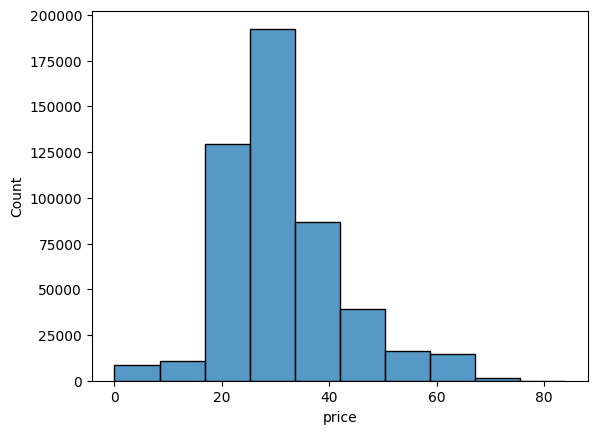

In [20]:
sns.histplot(dt_pd['price'], bins=10)

<Axes: xlabel='price'>

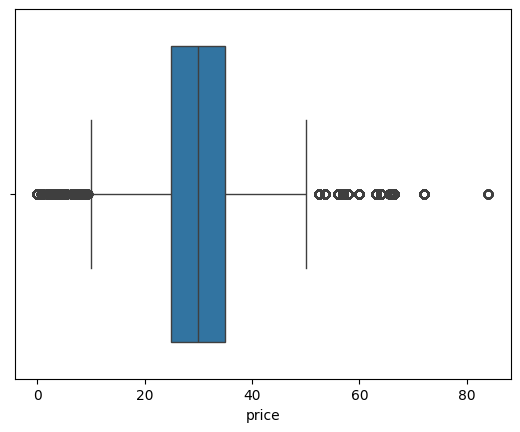

In [22]:
sns.boxplot(x = dt_pd['price'])

# Data Cleansing with Spark


*   Correct data type in timestamp column
*   Anomalies Check: Syntactical Anomalies, Semantic Anomalies, Missing values, Outliers



In [24]:
from pyspark.sql import functions as f

dt_clean = dt.withColumn("timestamp",
                        f.to_timestamp(dt.timestamp, 'yyyy-MM-dd HH:mm:ss')
                        )
dt_clean.show()

+-------------------+--------+-------+--------------------+-----+
|          timestamp| user_id|book_id|             country|price|
+-------------------+--------+-------+--------------------+-----+
|2021-05-01 08:03:44|824dc295|      2|              Israel|24.95|
|2021-05-02 02:48:34|f80fe106|      6|            Thailand|31.49|
|2021-05-01 16:54:57|01cb9fe0|      9|               Italy|29.65|
|2021-05-01 21:45:28|59508f47|     13|        South Africa| 22.4|
|2021-05-01 14:50:52|3553ebbb|     14|              Canada| 28.0|
|2021-05-01 08:41:48|ea28260a|     16|United States of ...|31.18|
|2021-05-01 05:51:43|ff44767e|     18|United States of ...|59.99|
|2021-05-01 00:01:09|b07799e7|     20|              Canada| 28.0|
|2021-05-01 00:21:24|9d2e93c8|     20|             Hungary| 28.0|
|2021-05-01 01:34:23|612db483|     20|              Sweden| 28.0|
|2021-05-01 01:42:10|afad01ae|     20|              France| 28.0|
|2021-05-01 03:38:00|3b68cda1|     20|              Canada| 28.0|
|2021-05-0

In [25]:
dt_clean.printSchema()

root
 |-- timestamp: timestamp (nullable = true)
 |-- user_id: string (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- price: double (nullable = true)



In [26]:
# Syntactical Anomalies
dt_clean.select("Country").distinct().count()

58

In [27]:
dt_clean.select("Country").distinct().sort("Country").show( 58, False )

+------------------------+
|Country                 |
+------------------------+
|Algeria                 |
|Argentina               |
|Australia               |
|Austria                 |
|Bahamas                 |
|Belgium                 |
|Brazil                  |
|Canada                  |
|China                   |
|Colombia                |
|Croatia                 |
|Denmark                 |
|Dubai                   |
|Egypt                   |
|Estonia                 |
|Finland                 |
|France                  |
|Germany                 |
|Greece                  |
|Hungary                 |
|India                   |
|Indonesia               |
|Ireland                 |
|Israel                  |
|Italy                   |
|Jamaica                 |
|Japan                   |
|Japane                  |
|Kenya                   |
|Kuwait                  |
|Malaysia                |
|Maldives                |
|Mexico                  |
|Montenegro              |
|

In [28]:
dt_clean.where(dt_clean['Country'] == 'Japane').show()

+-------------------+--------+-------+-------+-----+
|          timestamp| user_id|book_id|country|price|
+-------------------+--------+-------+-------+-----+
|2021-05-01 13:11:11|a904217a|   1129| Japane|29.65|
|2021-05-02 10:27:42|a6052e97|   1466| Japane| 35.0|
|2021-05-04 10:44:41|a0f44c26|   1497| Japane|17.49|
|2021-05-04 05:40:46|ad0f9907|   2269| Japane|35.71|
|2021-05-05 01:08:25|aa169f5d|   1378| Japane|59.93|
|2021-05-04 17:42:32|a28e3c68|   1411| Japane|29.99|
|2021-05-05 16:29:39|a909212e|   1652| Japane|24.99|
|2021-05-06 23:10:29|a7b05d98|   1420| Japane|30.79|
|2021-05-07 22:18:42|a169255e|   1459| Japane|25.08|
|2021-05-08 06:06:15|ab2159d6|   1035| Japane|22.67|
|2021-05-09 02:46:06|a6cba2fc|   1928| Japane|  7.0|
|2021-05-09 12:12:35|a0e31842|   1358| Japane|34.99|
|2021-05-11 16:33:19|a2bc5460|   1616| Japane|29.65|
|2021-05-12 22:32:52|af75e4d1|   1603| Japane|18.89|
|2021-05-12 19:14:33|a0accb45|   1934| Japane| 1.95|
|2021-05-13 05:23:12|abfe1e79|   1368| Japane|

In [30]:
from pyspark.sql.functions import when

dt_clean_country = dt_clean.withColumn("CountryUpdate", when(dt_clean['Country'] == 'Japane', 'Japan').otherwise(dt_clean['Country']))

dt_clean_country.select("CountryUpdate").distinct().sort("CountryUpdate").show(58, False)

+------------------------+
|CountryUpdate           |
+------------------------+
|Algeria                 |
|Argentina               |
|Australia               |
|Austria                 |
|Bahamas                 |
|Belgium                 |
|Brazil                  |
|Canada                  |
|China                   |
|Colombia                |
|Croatia                 |
|Denmark                 |
|Dubai                   |
|Egypt                   |
|Estonia                 |
|Finland                 |
|France                  |
|Germany                 |
|Greece                  |
|Hungary                 |
|India                   |
|Indonesia               |
|Ireland                 |
|Israel                  |
|Italy                   |
|Jamaica                 |
|Japan                   |
|Kenya                   |
|Kuwait                  |
|Malaysia                |
|Maldives                |
|Mexico                  |
|Montenegro              |
|Netherlands             |
|

In [31]:
dt_clean = dt_clean_country.drop("Country").withColumnRenamed('CountryUpdate', 'Country')

In [32]:
# Semantic Anomalies
dt_clean.select("user_id").show(10)

+--------+
| user_id|
+--------+
|824dc295|
|f80fe106|
|01cb9fe0|
|59508f47|
|3553ebbb|
|ea28260a|
|ff44767e|
|b07799e7|
|9d2e93c8|
|612db483|
+--------+
only showing top 10 rows



In [34]:
dt_clean.select('user_id').count()

500000

In [35]:
dt_clean.where(dt_clean["user_id"].rlike("^[a-z0-9]{8}$")).count()

499996

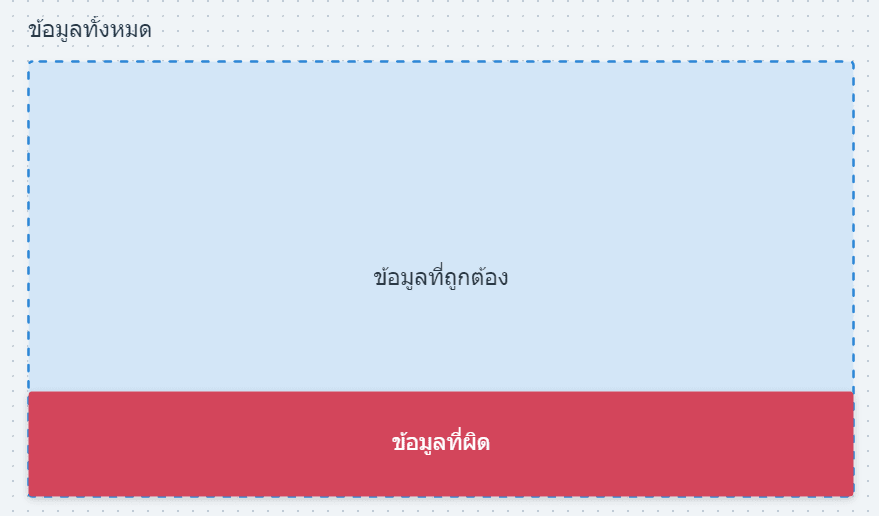

In [36]:
dt_correct_userid = dt_clean.filter(dt_clean["user_id"].rlike("^[a-z0-9]{8}$"))
dt_incorrect_userid = dt_clean.subtract(dt_correct_userid)

dt_incorrect_userid.show(10)

+-------------------+----------+-------+-----+--------------------+
|          timestamp|   user_id|book_id|price|             Country|
+-------------------+----------+-------+-----+--------------------+
|2021-05-01 14:41:20|      null|    516|27.37|              Brazil|
|2021-06-30 02:27:00|      null|   1390|27.99|               Japan|
|2021-06-19 16:00:22|ca86d17200|   2269|35.71|United States of ...|
|2021-07-15 18:53:09|ca86d17200|    322|30.79|United States of ...|
+-------------------+----------+-------+-----+--------------------+



In [37]:
dt_clean_userid = dt_clean.withColumn("userid_update",
                                       when(dt_clean['user_id'] == 'ca86d17200', 'ca86d172').otherwise(dt_clean['user_id'])
                                       )

In [38]:
dt_correct_userid = dt_clean_userid.filter(dt_clean_userid["userid_update"].rlike("^[a-z0-9]{8}$"))
dt_incorrect_userid = dt_clean_userid.subtract(dt_correct_userid)

dt_incorrect_userid.show(10)

+-------------------+-------+-------+-----+-------+-------------+
|          timestamp|user_id|book_id|price|Country|userid_update|
+-------------------+-------+-------+-----+-------+-------------+
|2021-05-01 14:41:20|   null|    516|27.37| Brazil|         null|
|2021-06-30 02:27:00|   null|   1390|27.99|  Japan|         null|
+-------------------+-------+-------+-----+-------+-------------+



In [39]:
dt_clean = dt_clean_userid.drop("user_id").withColumnRenamed('userid_update', 'user_id')
dt_clean.where(dt_clean["user_id"].rlike("^[a-z0-9]{8}$")).count()

499998

In [40]:
# Missing values
dt_clean.where( dt_clean.user_id.isNull() ).show()

+-------------------+-------+-----+-------+-------+
|          timestamp|book_id|price|Country|user_id|
+-------------------+-------+-----+-------+-------+
|2021-05-01 14:41:20|    516|27.37| Brazil|   null|
|2021-06-30 02:27:00|   1390|27.99|  Japan|   null|
+-------------------+-------+-----+-------+-------+



In [42]:
# Data analyst team inform that replace "NULL" user_id by "00000000"
dt_clean = dt_clean.withColumn("user_id",
                                       when(dt_clean['user_id'].isNull(), '00000000').otherwise(dt_clean['user_id'])
                                       )

dt_clean.where( dt_clean.user_id.isNull() ).show()

+---------+-------+-----+-------+-------+
|timestamp|book_id|price|Country|user_id|
+---------+-------+-----+-------+-------+
+---------+-------+-----+-------+-------+



From Grapphical EDA section

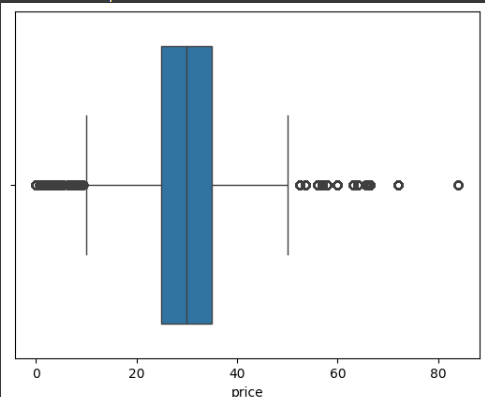

In [43]:
# Outliers
dt_clean.where( dt_clean.price > 80 ).select("book_id").distinct().show()

+-------+
|book_id|
+-------+
|    635|
+-------+



Check price in data source. The price is correct.
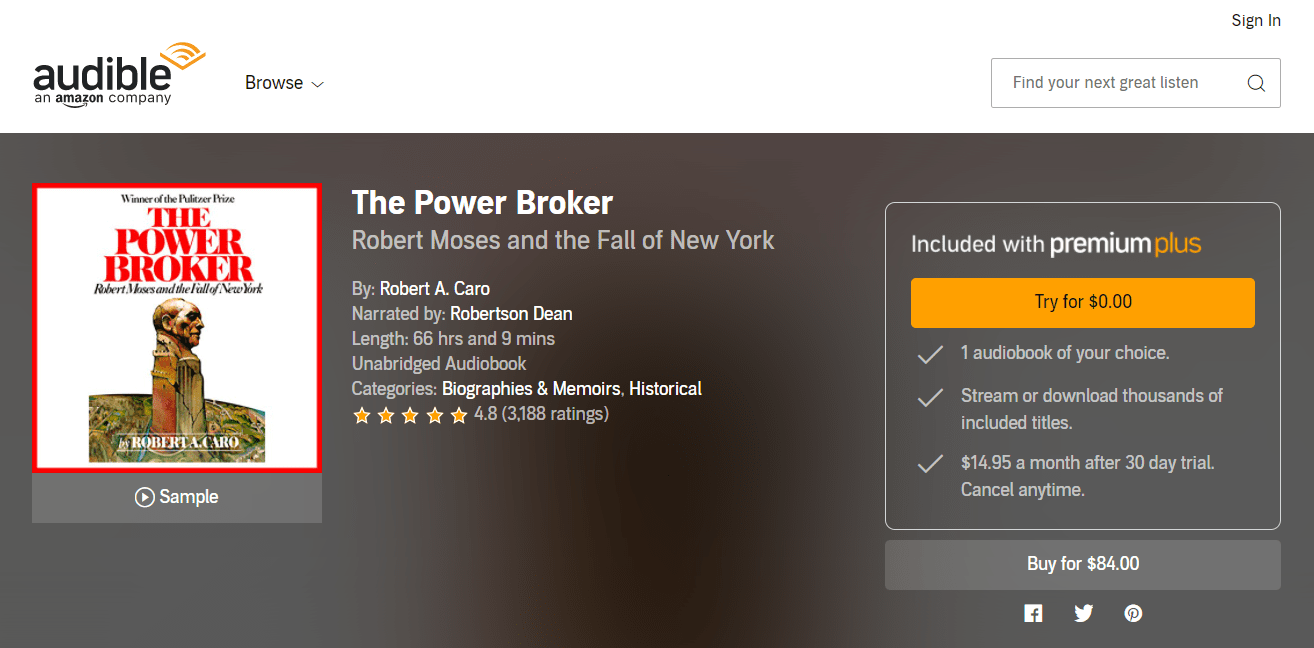

In [44]:
#Save to CSV
dt_clean.coalesce(1).write.csv('Cleaned_Data_Single.csv', header = True)

End of Workshop